In [1]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
from numpy import geomspace
import math
import matplotlib
from cycler import cycler
matplotlib.rcParams['axes.prop_cycle'] = cycler(color='brgmcyk')

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

Welcome to JupyROOT 6.14/04
../InputData/zT_Rebin_8_006zT06zT/pp_SE_L0_Correlation_GMB_Ratio.root
['pp', 'p-Pb']
[[0.18166926]
 [0.11830461]]
pp File: ../InputData/zT_Rebin_8_006zT06zT/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_8_006zT06zT/pPb_SE_L0_Correlation_GMB_Ratio.root
../InputData/zT_Rebin_8_006zT06zT/pp_SE_L0_Correlation_GMB_Ratio.root
['pp', 'p-Pb']
[[0.18166926]
 [0.11830461]]
pp File: ../InputData/zT_Rebin_8_006zT06zT/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_8_006zT06zT/pPb_SE_L0_Correlation_GMB_Ratio.root


In [2]:
print ZYAM_Min_i
print dPhi_Bins[ZYAM_Min_i]
print ZYAM_Max_i
print dPhi_Bins[ZYAM_Max_i]
print(pTbins)
print(delta_phi_centers)
print(dphi_start_integral)

1
0.392699081699
4
1.57079632679
[12, 40]
[0.19634954084936207, 0.5890486225480862, 0.9817477042468103, 1.3744467859455345, 1.7671458676442586, 2.1598449493429825, 2.552544031041707, 2.945243112740431]
7


In [3]:
print dPhi_Width

0.392699081699


In [4]:
print pTbins
print zTbins

[12, 40]
[0.06  0.08  0.107 0.142 0.19  0.253 0.337 0.45  0.6  ]


**root to numpy**

In [5]:
Corrs = ROOT_to_nparray()
#print(Corrs["p-Pb_Uncorr_Estimate"][0][1])
#Plot_UB_Subtraction(Corrs)
#print_from_Dict(Corrs)

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

In [6]:
reload(functions_correlations)
import functions_correlations
from functions_correlations import *

In [7]:
#Plot_Sub_UB_Overlay(Corrs)

In [8]:
Correlated_Subtraction_Weights(Corrs)
#print_from_Dict(Corrs)

In [9]:
#Plot_UB()

**Pedestal Subtraction**

In [10]:
#print_from_Dict(Corrs)
#print(Corrs["pp_CSR"][0])
Plot = False
if Plot:
    for ipt in range(N_pT_Bins):
        for izt in range(NzT):
            fig = plt.figure(figsize=(8,7))
            #Cs_Correlations_Unsub_Overlay(delta_phi_centers, Corrs["pp_CSR"][0][izt],  Corrs["pp_CSR_Errors"][0][izt],UE_binmin=2, UE_binmax=9,label='data',color='black')
            GetRatio(Corrs["pp_CSR"][0][izt],Corrs["pp_CSR_Errors"][0][izt],Corrs["p-Pb_CSR"][0][izt],Corrs["p-Pb_CSR_Errors"][0][izt],delta_phi_centers)
            plt.annotate(r'%1.2f < $z_\mathrm{T}$ < %1.2f'%(zTbins[izt],zTbins[izt+1]), xy=(0.99, 0.01), xycoords='axes fraction', ha='right', va='bottom', fontsize=16)

            plt.savefig('pics/%s/%s/Befor_After_UE_pp-pPb_pT_%i_zT_%i.pdf'%(Shower,description_string,ipt,izt))

In [11]:
Ped_Sub_After_Cs(Corrs)

In [12]:
reload(functions_correlations)
from functions_correlations import *

/Users/fernando/Library/Python/2.7/lib/python/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


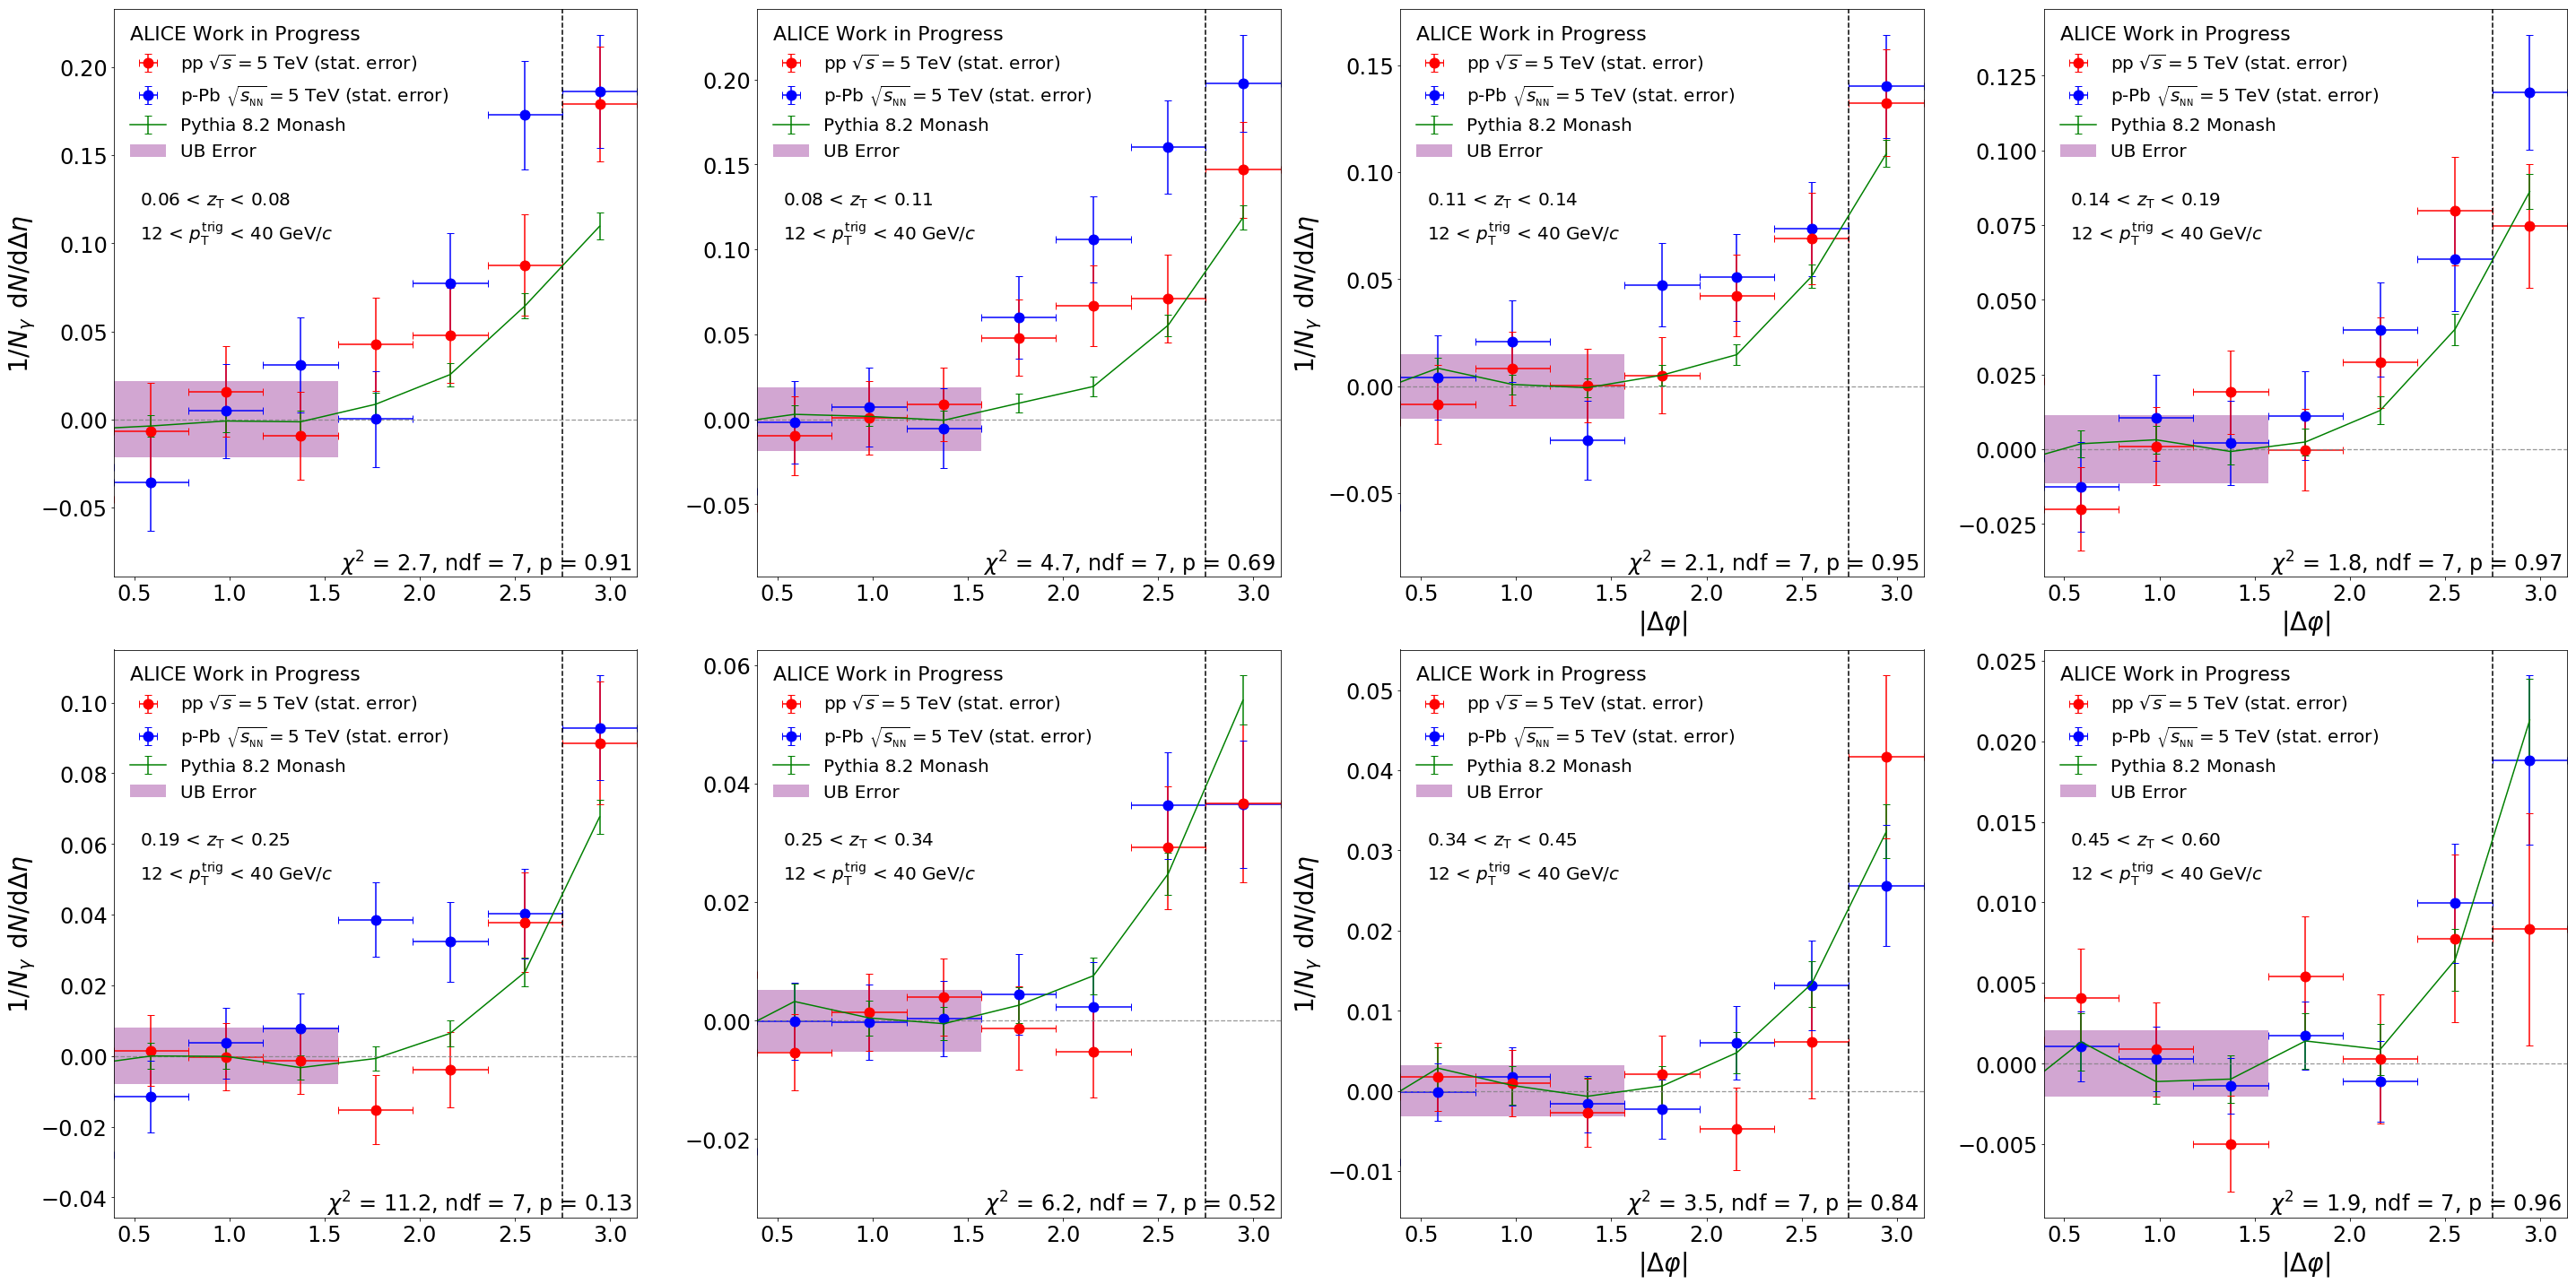

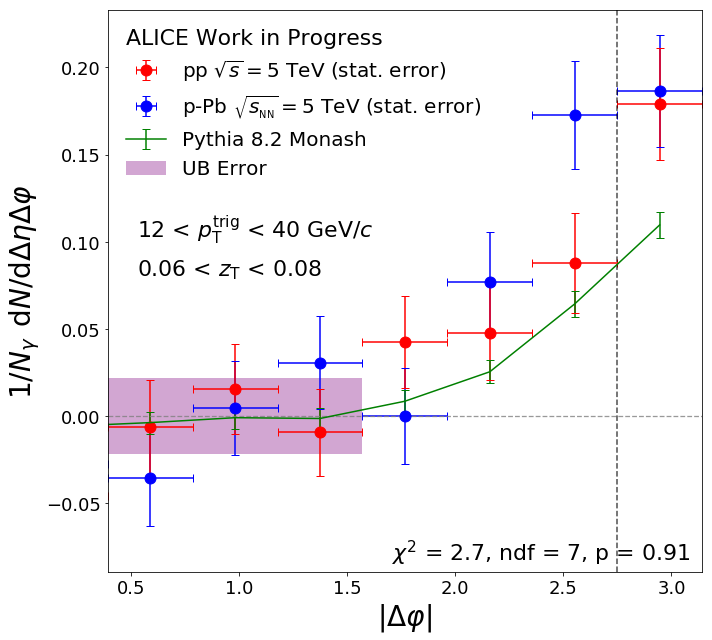

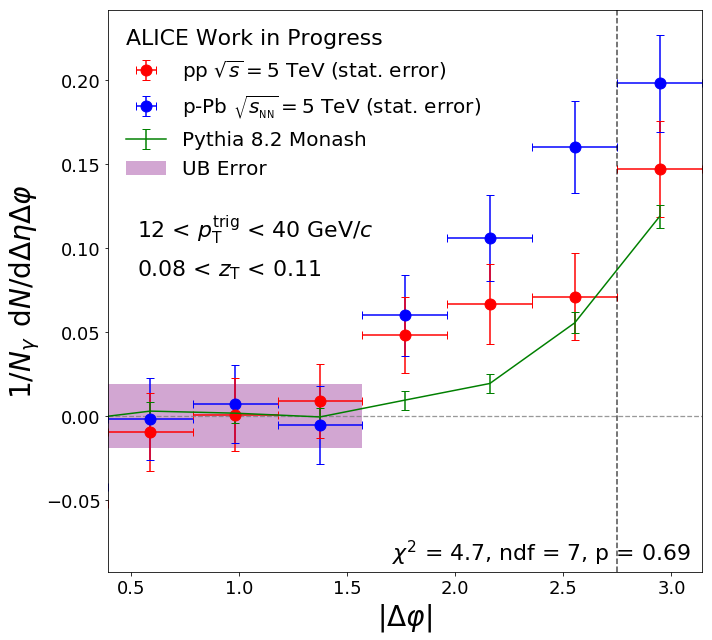

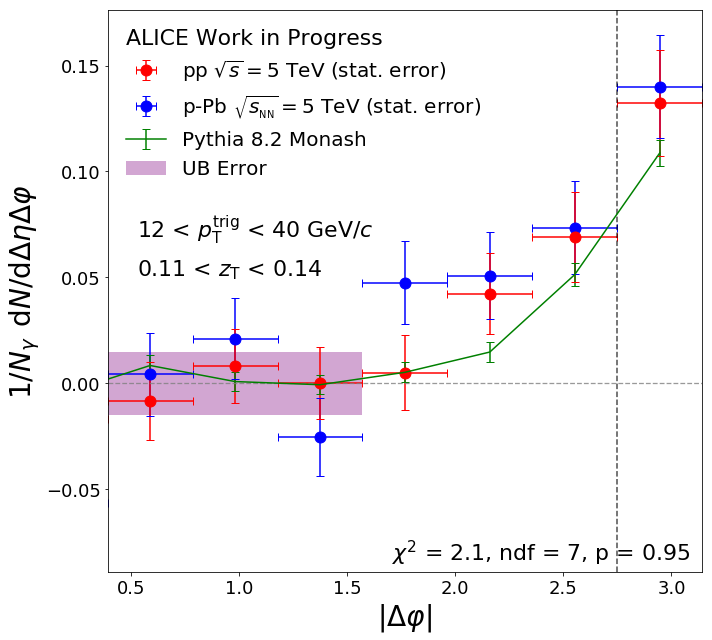

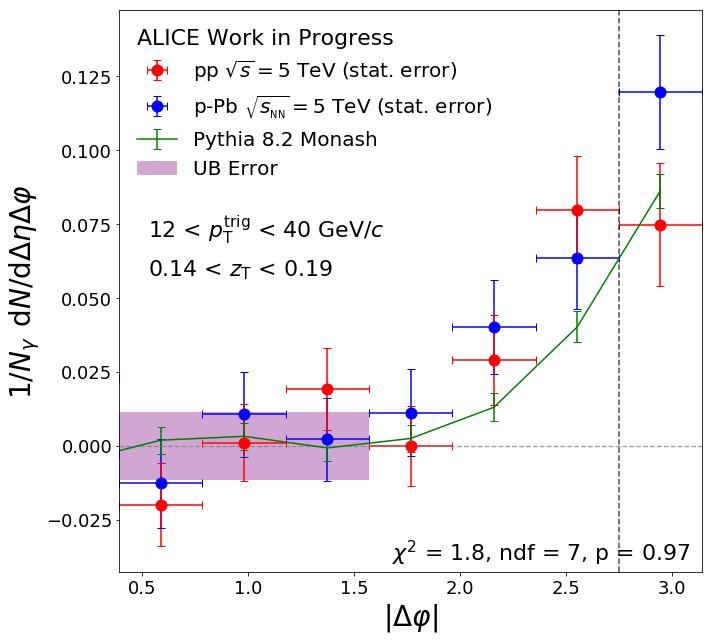

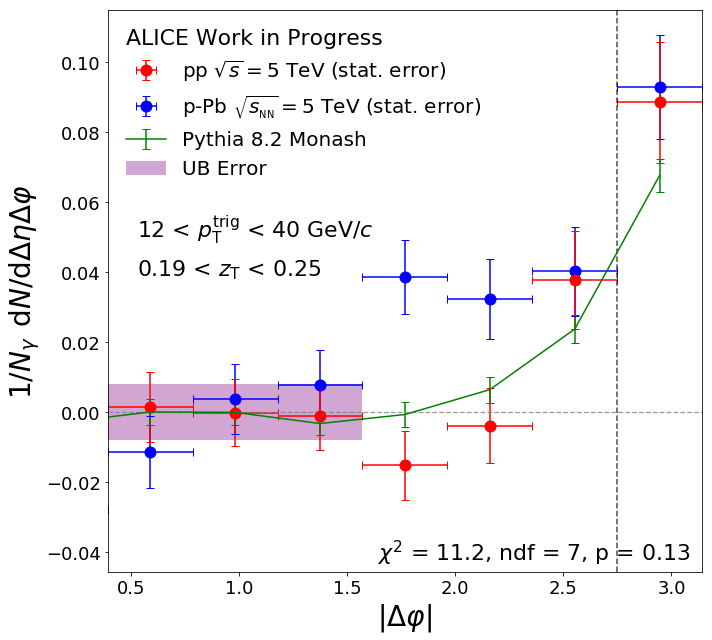

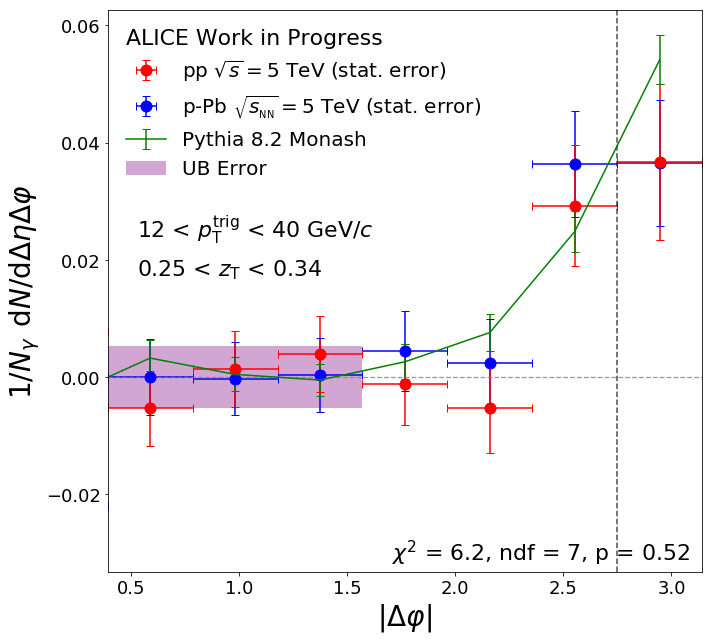

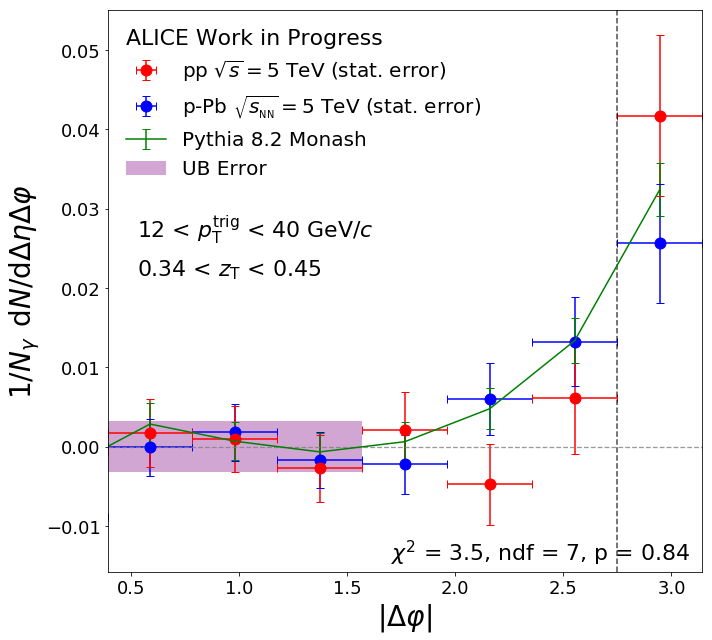

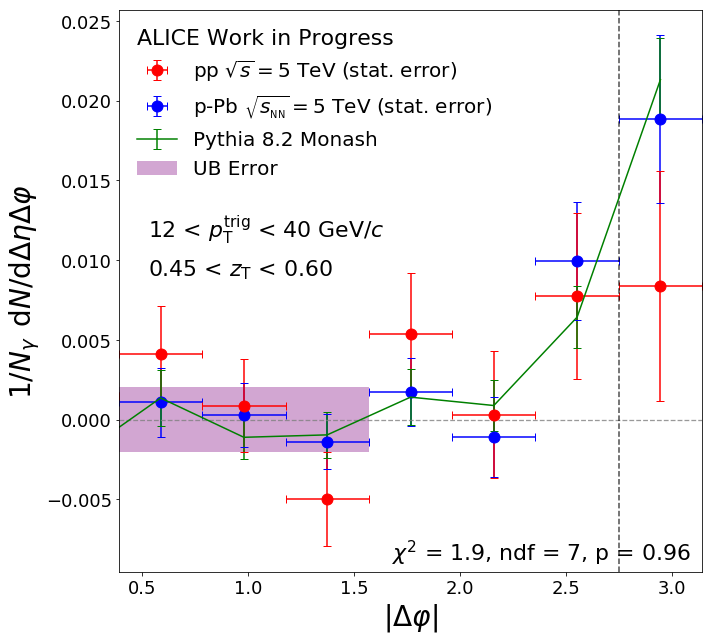

In [13]:
Plot_pp_pPb_Cs(Corrs)
Plot_pp_pPb_Cs_Individual(Corrs) #NOOOOTTTTTTEEEE
#Compare_Cs_pTBins()

**Debugging**

In [14]:
print("Number of Away side bins = %i"%(N_Phi_Integrate))

print(Corrs['pp_CSR'][0][3])

for SYS in Systems:
    print(SYS)
    vals = Corrs['%s_CSR'%(SYS)][0][7][-N_Phi_Integrate:] #2nd zT bin
    Integral = np.sum(vals)/(dPhi_Width*N_Phi_Integrate)

    val_errors = Corrs['%s_CSR_Errors'%(SYS)][0][7][-N_Phi_Integrate:]
    Integral_Err = math.sqrt(np.sum(val_errors**2))/(dPhi_Width*N_Phi_Integrate)

    UE_Error = Corrs['%s_Uncorr_Error'%(SYS)][0][7][1]/(dPhi_Width*(ZYAM_Max_i-ZYAM_Min_i)) #is a scalar

    print("%f +\- %f +\- %f"%(Integral,Integral_Err,UE_Error))
    Total_Err = math.sqrt(Integral_Err**2 + UE_Error**2)
    print(Total_Err/Integral)
    
    print("non-dphi rate %1.3f"%(Corrs['%s_Uncorr_Error'%(SYS)][0][7][1]))

Number of Away side bins = 1
[ 0.02274006 -0.02001382  0.00096602  0.01904779 -0.00019105  0.02900295
  0.07969168  0.07470787]
pp
0.021275 +\- 0.018347 +\- 0.004369
0.8865044019795647
non-dphi rate 0.005
p-Pb
0.047947 +\- 0.013386 +\- 0.002891
0.28562101151981273
non-dphi rate 0.003


**Average Cs**: $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ in each $z_\mathrm{T}$ bin (i)

In [15]:
Avg_Corr = Cs_Weighted_Average(Corrs)
#Plot_pp_pPb_Cs(Avg_Corr)
#Plot_pp_pPb_Cs_Individual(Avg_Corr)

In [16]:
reload(functions_correlations)
from functions_correlations import *

In [17]:
list = [18,8,5.6]
list = [18,9,5.6]
list = [18,6,5.6]
list = [18,21,5.6]
list = [12,6,5.6,5]
list = [12,10,5.6,5]
list = [12,7,5.6,5]
list = [12,8,5.6,5]
quad_sum = 0
for i in list:
    quad_sum += i**2

quad_sum = math.sqrt(quad_sum)
print(quad_sum)
    

16.2591512694


In [18]:
Frags = Get_Fragmentation(Corrs)
LaTeX_Results_Summary(Frags)
LaTeX_Ratio_Systematics(Frags)
#print(Frags["pp_FF_Errors"][0])
#print(Frags["pp_purity_FF_Errors"])
#for i in range(len(Frags["pp_FF"][0])):
#    print("%f"%(Frags["pp_FF_Errors"][0][i]/Frags["pp_FF"][0][i])),

[[0.75037853 0.47606089 0.290406   0.16407453 0.08872664 0.04431744
  0.02156145 0.01143907]]
                        LaTeX Table
Source   &  pp data & p--Pb~data  \\
Statistical Uncertainty & 20\%-89\% & 16\%-31\% \\
\hline
Purity & 18\%-18\% & 12\%-12\% \\
UE & 6\%-21\% & 6\%-10\% \\
Tracking Efficiency &  5\% & 5\%  \\ 
pp


$\zt$ interval  & Statistics  & UE Estimate  & Purity   & Tracking Efficiency \\
\hline
0.06 - 0.08 & 28\% & 12\% & 22\% & 7\%\\
0.08 - 0.11 & 27\% & 11\% & 22\% & 7\%\\
0.11 - 0.14 & 28\% & 11\% & 22\% & 7\%\\
0.14 - 0.19 & 34\% & 13\% & 22\% & 7\%\\
0.19 - 0.25 & 27\% & 9\% & 22\% & 7\%\\
0.25 - 0.34 & 49\% & 14\% & 22\% & 7\%\\
0.34 - 0.45 & 39\% & 10\% & 22\% & 7\%\\
0.45 - 0.60 & 93\% & 21\% & 22\% & 7\%\\
p-Pb


$\zt$ interval  & Statistics  & UE Estimate  & Purity   & Tracking Efficiency \\
\hline
0.06 - 0.08 & 28\% & 12\% & 22\% & 7\%\\
0.08 - 0.11 & 27\% & 11\% & 22\% & 7\%\\
0.11 - 0.14 & 28\% & 11\% & 22\% & 7\%\\
0.14 - 0.19 & 34\% & 13\% & 22\% & 7\

In [19]:
reload(functions_fragmentation)
from functions_fragmentation import *

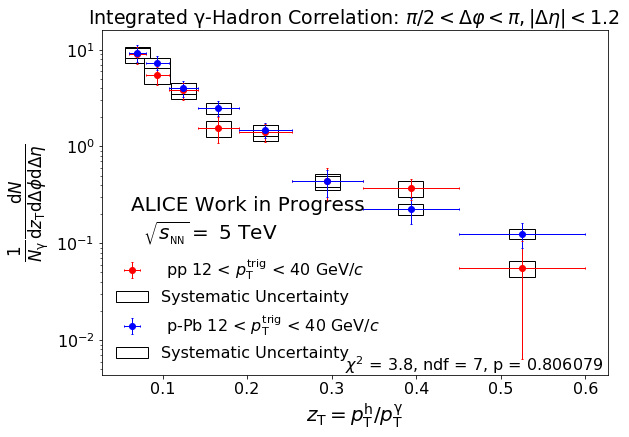

                    pp Central Values:
[8.9527716  5.43952056 3.78224783 1.55641399 1.40566196 0.43650862
 0.36895718 0.05569658]

                    pp Stat. Uncertainty:
[1.78336348 1.15356784 0.77226981 0.46099964 0.28965989 0.16523984
 0.09238535 0.04937526]

              pp Systematic Uncertainty:
[1.68691977 1.02493788 0.71266742 0.29326622 0.26486088 0.08224883
 0.0695205  0.01049459]

                    p-Pb Central Values:
[9.31152903 7.32637925 4.00134963 2.48748661 1.47425017 0.43529984
 0.2267565  0.12552479]

                    p-Pb Stat. Uncertainty:
[1.78754718 1.1727379  0.75892032 0.43726949 0.25240116 0.13564078
 0.06913849 0.03585252]

              p-Pb Systematic Uncertainty:
[1.1959419  0.94097585 0.51392007 0.31948453 0.1893478  0.05590847
 0.02912385 0.01612199]

                        LaTeX Table
Source   &  pp data & \pPb~data  \\
Statistical Uncertainty & 20\%-89\% & 16\%-31\% \\
\hline
Purity & 18\%-18\% & 12\%-12\% \\
Tracking Efficiency &  5\% & 5\%  

In [20]:
Combined_Frags = Average_FF(Frags)
Plot_pp_pPb_Avg_FF(Combined_Frags)

#print(Combined_Frags.keys())

#Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)
#print_from_Dict(Frags)


printthis = False
if printthis == True:
    print("zT Centers:")
    for izt in zT_centers:
        print("%1.2f,"%(izt)),
    print("")

    print("zT Widths:")
    for izt in zT_widths:
        print("%1.4f,"%(izt)),

#Frags_Avg_Cs = Get_Fragmentation(Avg_Corr,True)
#print_from_Dict(Frags_Avg_Cs)
#Plot_pp_pPb_Avg_FF_and_Ratio(Frags_Avg_Cs)

In [21]:
a = 730/521
a = 0.0730/0.0521
print(1.0/a)
7.7810
b = 1.1465/7.7810
print(b)

0.713698630137
0.147346099473


In [22]:
#LaTeX_Table(Combined_Frags)

[0.23387145 0.1921247  0.15568613 0.12913043 0.11925346 0.12991663
 0.15698885 0.19370827 0.23560668 0.28037181 0.32682781 0.37434571
 0.42256742 0.47127695 0.52033732 0.56965789 0.61917649 0.66884914
 0.71864388 0.768537  ]
0.971148854024


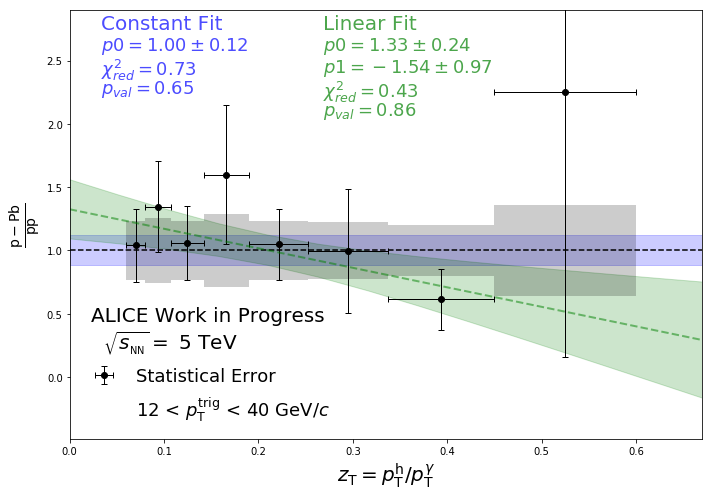

                Central Values:
[1.04007222 1.3468796  1.05792899 1.59821656 1.04879424 0.9972308
 0.61458759 2.25372524]

                Satistical Uncertainty Absolute:
[0.28773064 0.3578671  0.29482609 0.55047337 0.2809811  0.48894394
 0.24248051 2.09907548]

               Relative Satistical Uncertainty:
[0.27664487 0.26570088 0.2786823  0.34442978 0.2679087  0.49030168
 0.39454182 0.93138038]

                Ratio Uncertainty from Purity:
[0.21941713 0.24164771 0.22060873 0.26220908 0.21999743 0.21661554
 0.19567895 0.32263477]

                Ratio Uncertainty from Single Track Efficiency:
[0.07354421 0.09523877 0.07480688 0.11301098 0.07416095 0.07051487
 0.04345791 0.15936244]

                Full Systematic Uncertainty:
[0.2314144  0.2597384  0.23294695 0.28552597 0.23216097 0.22780395
 0.2004466  0.35984661]

                LaTeX Table:
$\zt$ range & pp & p--Pb & p--Pb/pp \\
0.06 - 0.08 & 8.953 $\pm$ 1.783 & 9.312 $\pm$ 1.788 & 1.040 $\pm$ 0.288 \\
0.08 - 0.11 & 5.440 $

In [23]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
#pp_pPB_Avg_Ratio(Frags_Avg_Cs,0)

### Compare Different Integrations

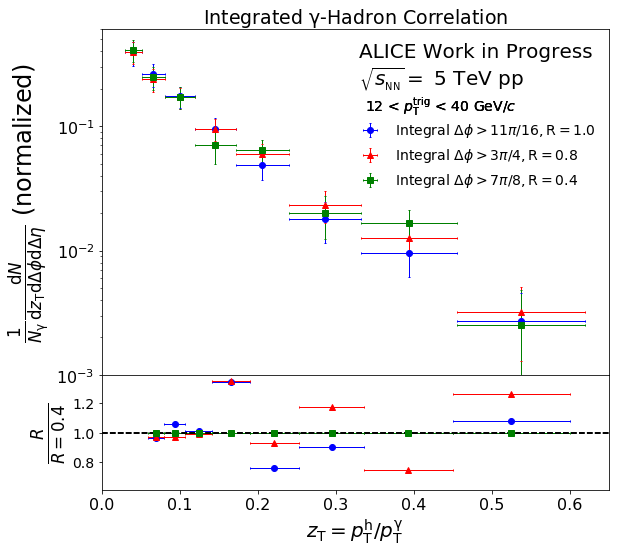

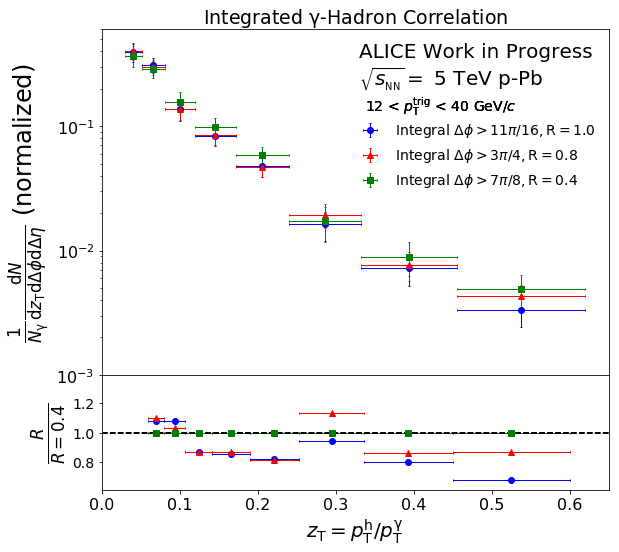

In [24]:
ranges = (1.9,2.15,2.7)
strings = ("11\pi/16, \mathrm{R} = 1.0","3\pi/4,\mathrm{R} = 0.8","7\pi/8, \mathrm{R} = 0.4","15\pi/16, \mathrm{R} = 0.2")

Compare_FF_Integration(ranges,strings)

In [25]:
print Systems

['pp', 'p-Pb']


In [29]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [39]:
reload(functions_correlations)
import functions_correlations
from functions_correlations import *

zT_Rebin_8_006zT06zTpPb
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTpPb.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTpPb.npy
zT_Rebin_8_006zT06zTPbp
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTPbp.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTPbp.npy
zT_Rebin_8_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy


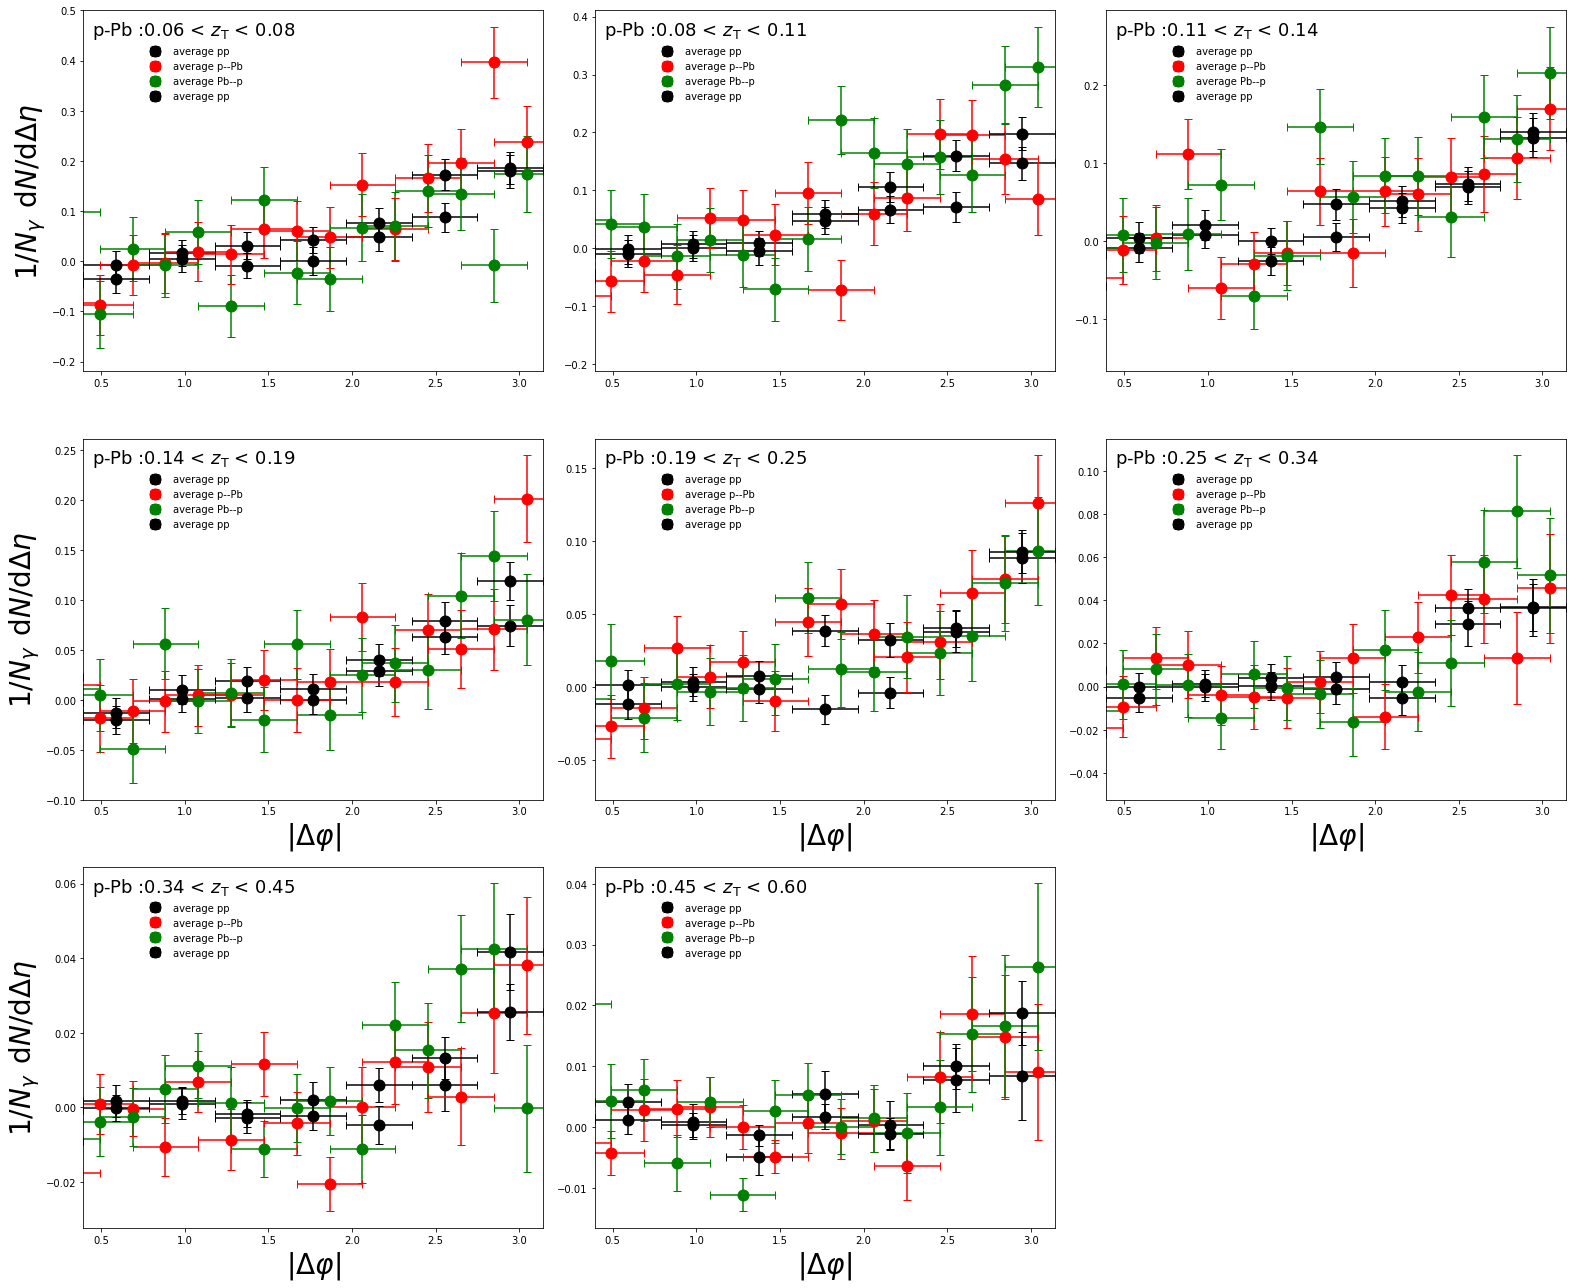

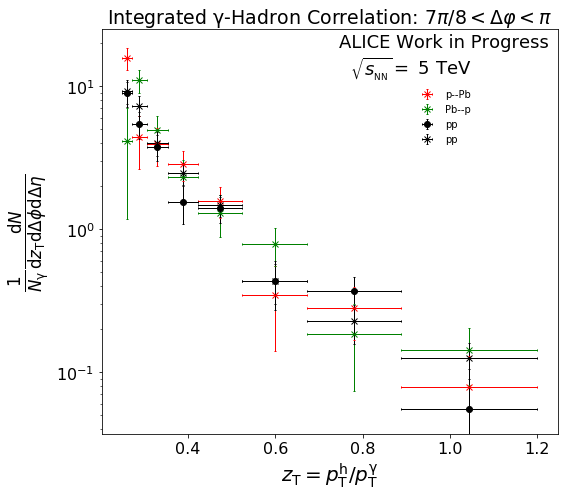

                Central Values:


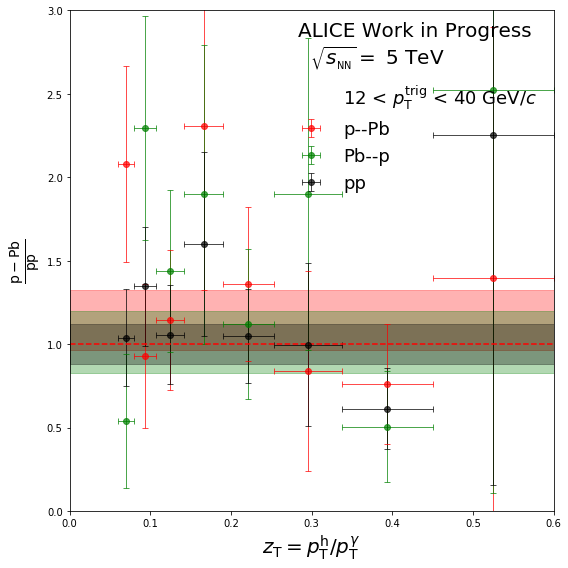

                Central Values:
[1.04007222 1.3468796  1.05792899 1.59821656 1.04879424 0.9972308
 0.61458759 2.25372524]

****************************************
Minimizer is Linear
Chi2                      =      5.83049
NDf                       =            7
p0                        =      1.14564   +/-   0.180387    

****************************************
Minimizer is Linear
Chi2                      =      10.5028
NDf                       =            7
p0                        =      1.01395   +/-   0.184605    

****************************************
Minimizer is Linear
Chi2                      =      5.09141
NDf                       =            7
p0                        =      1.00246   +/-   0.120582    


In [40]:
save_name = "Beam_Flip"
strings = ["zT_Rebin_8_006zT06zTpPb","zT_Rebin_8_006zT06zTPbp","zT_Rebin_8_006zT06zT"]
string_descriptions = ["p--Pb","Pb--p","pp"]
colors = ["red","green","black"]
Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

zT_Rebin_8_006zT06zTOldBinNewNewPurity
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTOldBinNewNewPurity.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTOldBinNewNewPurity.npy
pT_Rebin_2_006zT06zTOldBinNewNewPurity
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_2_006zT06zTOldBinNewNewPurity.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_2_006zT06zTOldBinNewNewPurity.npy


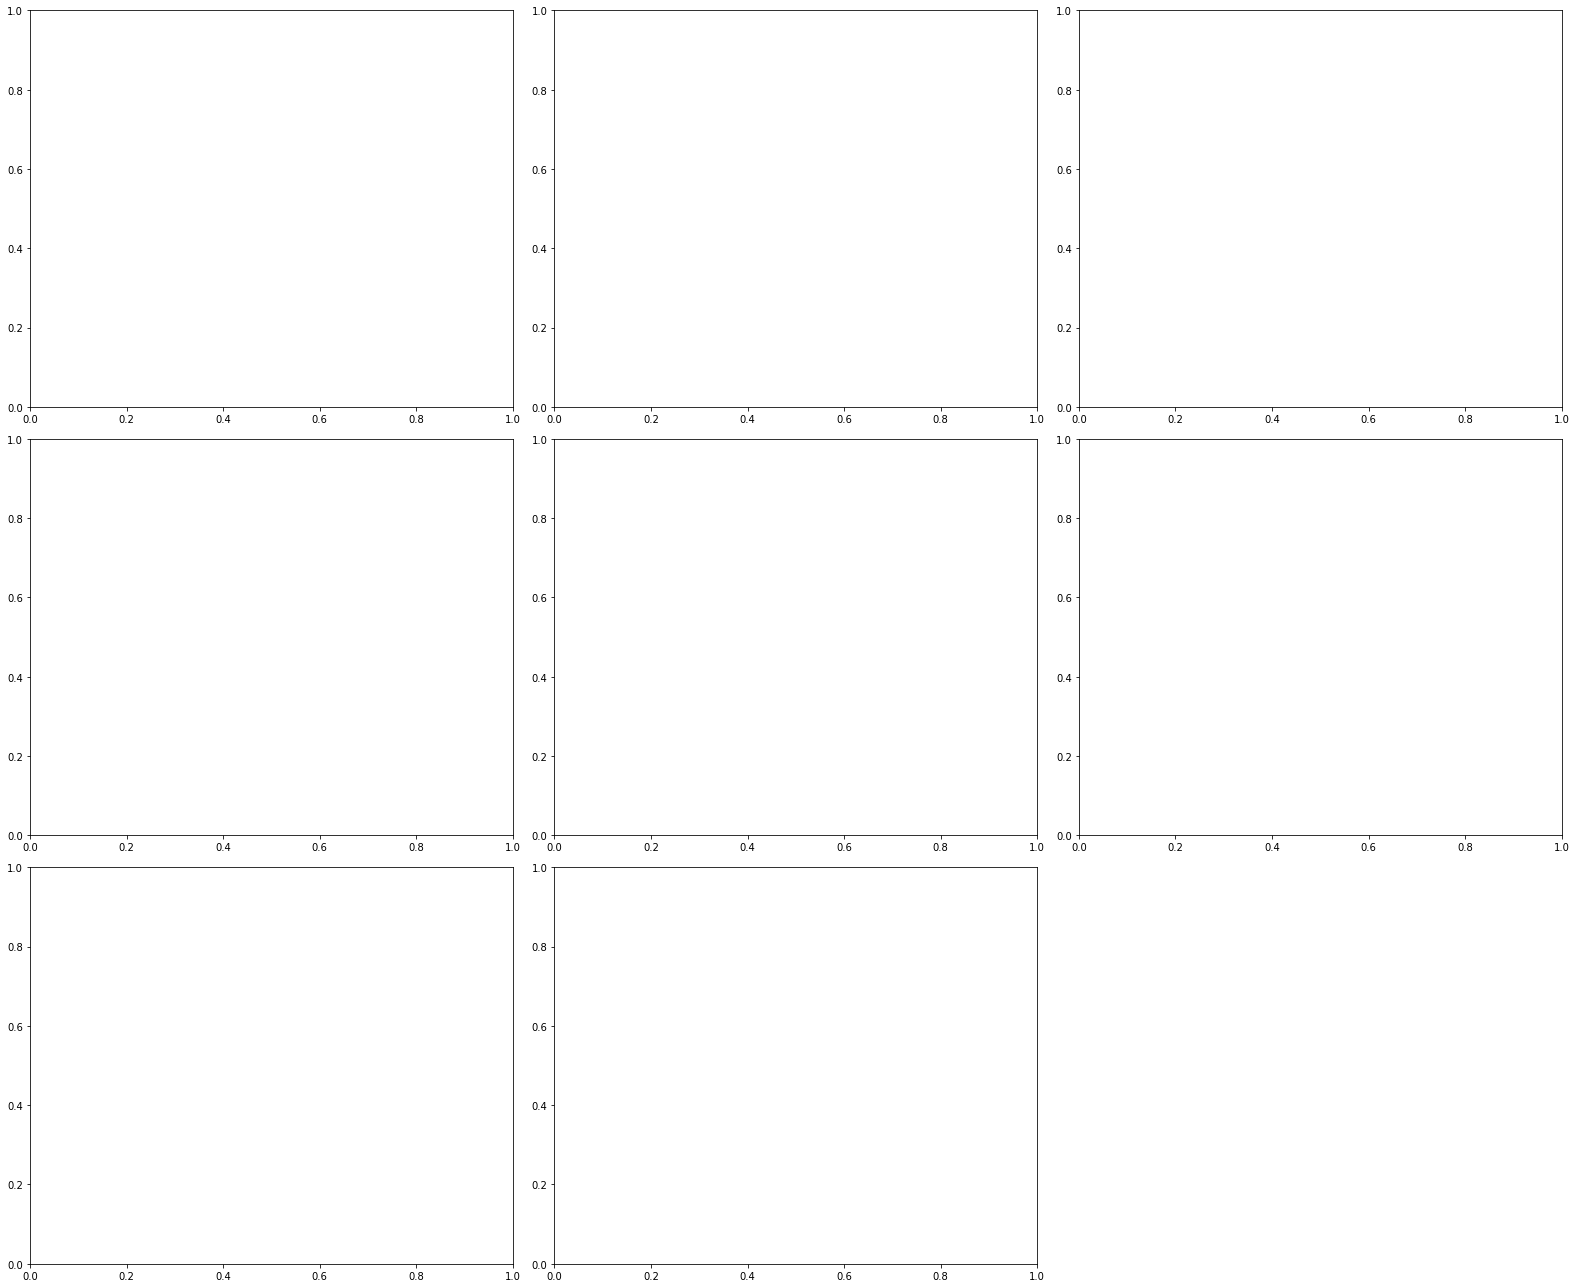

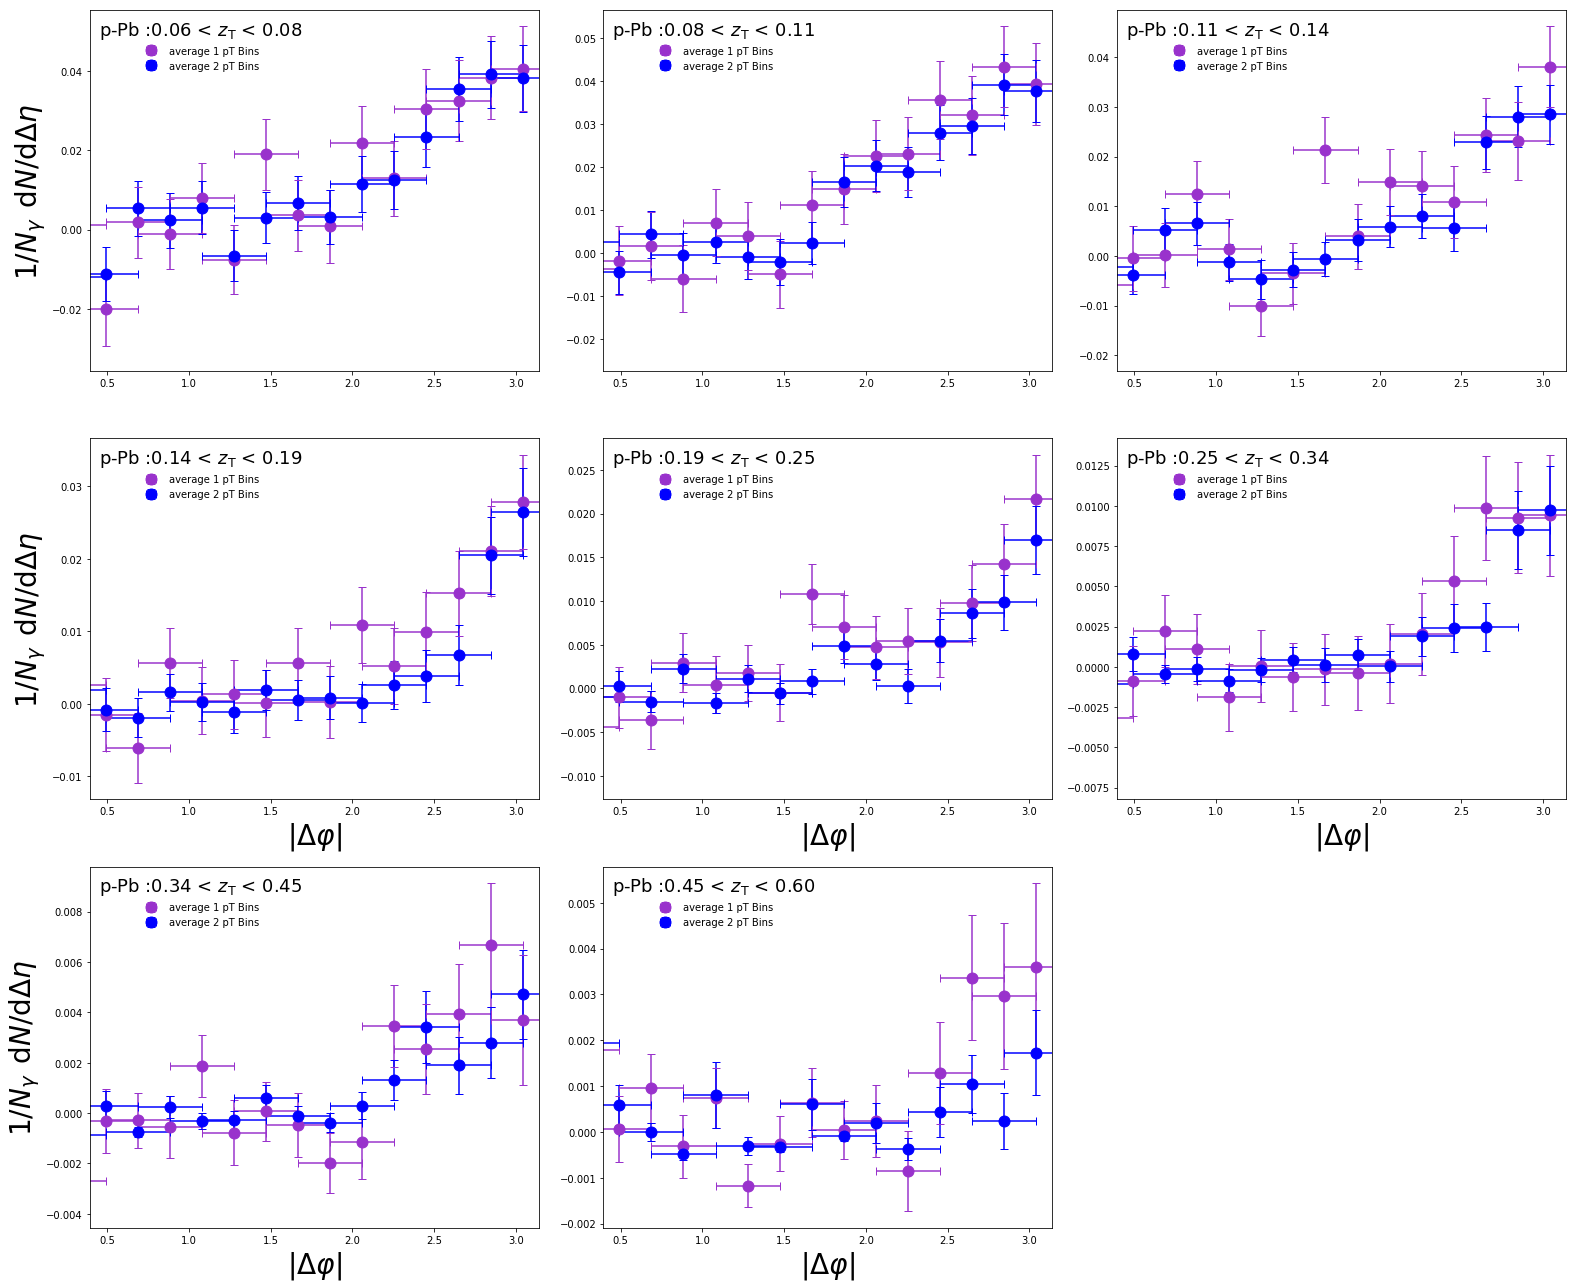

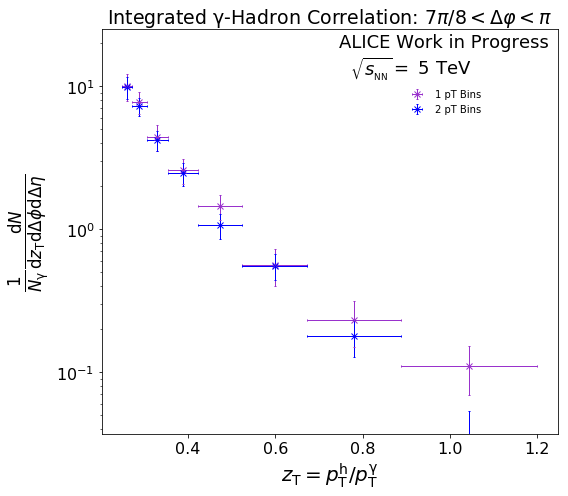

                Central Values:


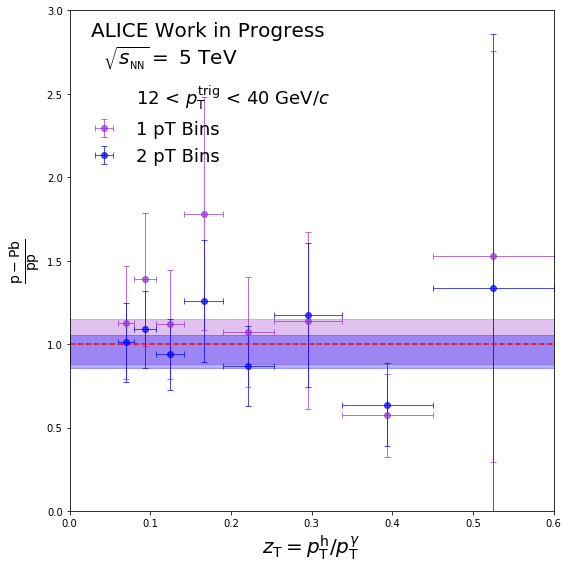

                Central Values:
[1.01093505 1.08854106 0.93861889 1.25833172 0.869122   1.17409343
 0.63776337 1.33439492]

****************************************
Minimizer is Linear
Chi2                      =      5.71077
NDf                       =            7
p0                        =      1.01644   +/-   0.133719    

****************************************
Minimizer is Linear
Chi2                      =      3.14836
NDf                       =            7
p0                        =     0.956749   +/-   0.0976632   


In [35]:
save_name = "pT Bin Comparison"
strings = ["zT_Rebin_8_006zT06zTOldBinNewNewPurity","pT_Rebin_2_006zT06zTOldBinNewNewPurity"]
string_descriptions = ["1 pT Bins","2 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

zT_Rebin_8_006zT06zTOldBinNewNewPurity
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTOldBinNewNewPurity.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTOldBinNewNewPurity.npy
zT_Rebin_7_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_7_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_7_006zT06zT.npy
zT_Rebin_9_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_9_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_9_006zT06zT.npy


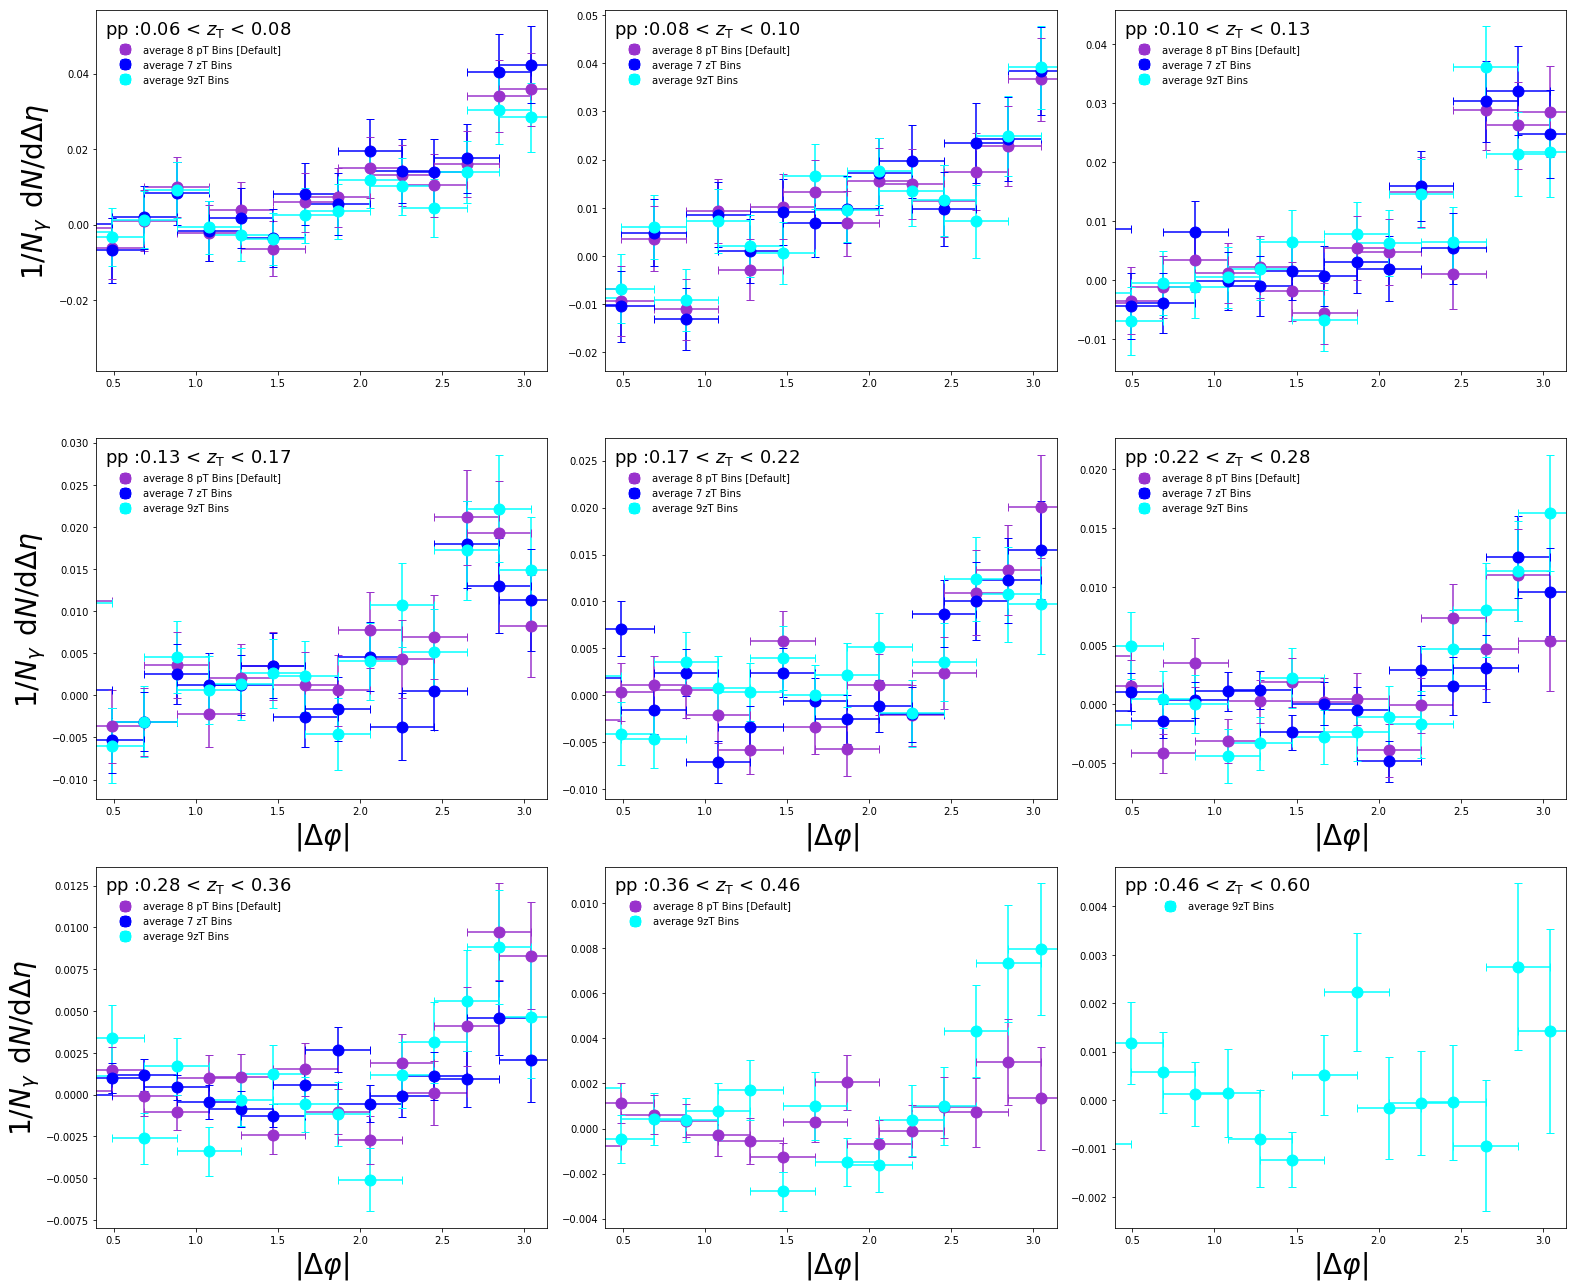

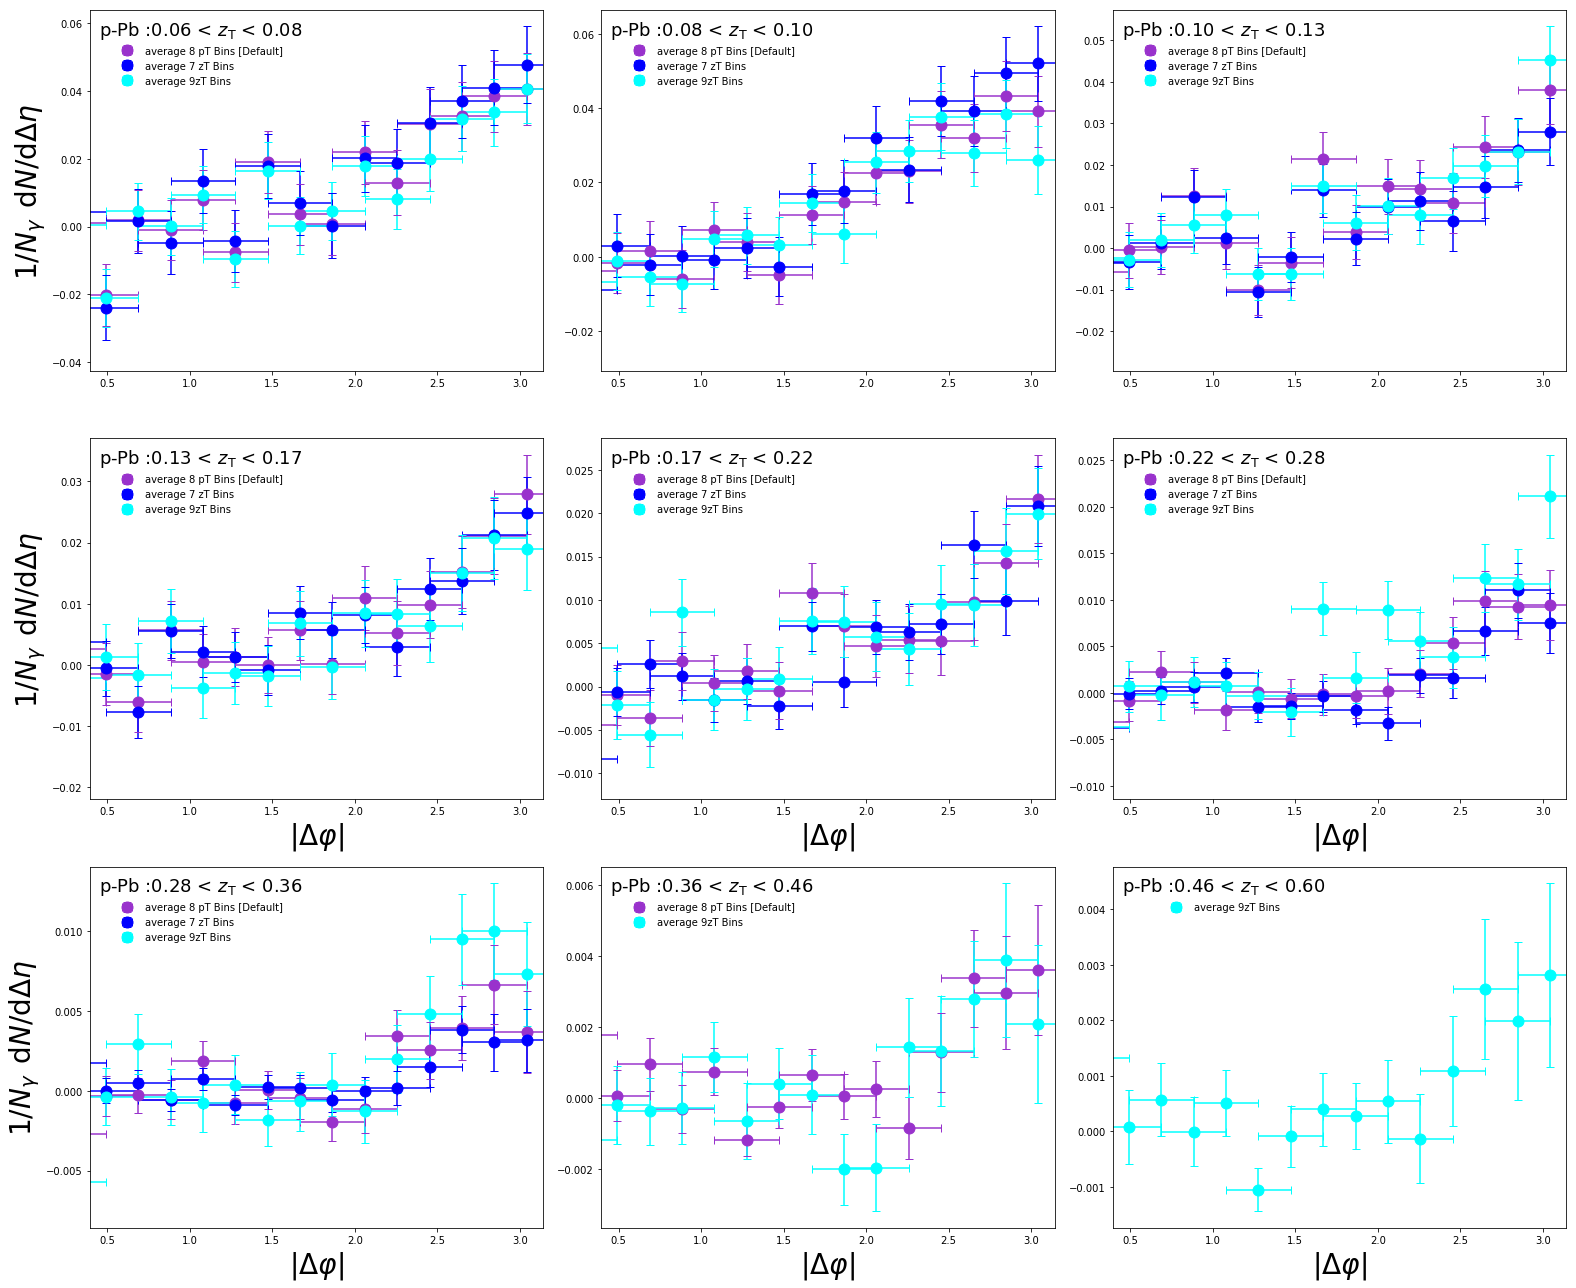

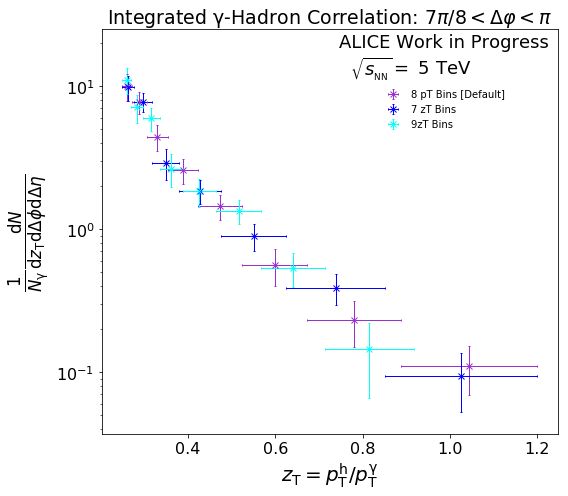

                Central Values:


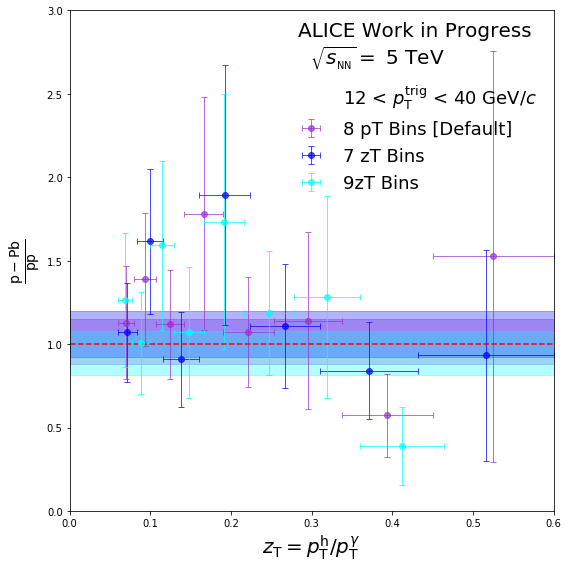

                Central Values:
[1.26432146 1.00883928 1.59188485 1.07046074 1.73434792 1.18782758
 1.28530072 0.38923048 1.15312974]

****************************************
Minimizer is Linear
Chi2                      =      5.71077
NDf                       =            7
p0                        =      1.01644   +/-   0.133719    

****************************************
Minimizer is Linear
Chi2                      =      3.70791
NDf                       =            6
p0                        =      1.06003   +/-   0.137798    

****************************************
Minimizer is Linear
Chi2                      =      9.92142
NDf                       =            8
p0                        =     0.946562   +/-   0.130805    


In [29]:
save_name = "zT_Comparison"
strings = ["zT_Rebin_8_006zT06zTOldBinNewNewPurity","zT_Rebin_7_006zT06zT","zT_Rebin_9_006zT06zT"]
string_descriptions = ["8 pT Bins [Default]","7 zT Bins", "9zT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

zT_Rebin_8_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy
zT_Rebin_8_006zT06zTOldBinNewNewPurity_Small_Zyam
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTOldBinNewNewPurity_Small_Zyam.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTOldBinNewNewPurity_Small_Zyam.npy


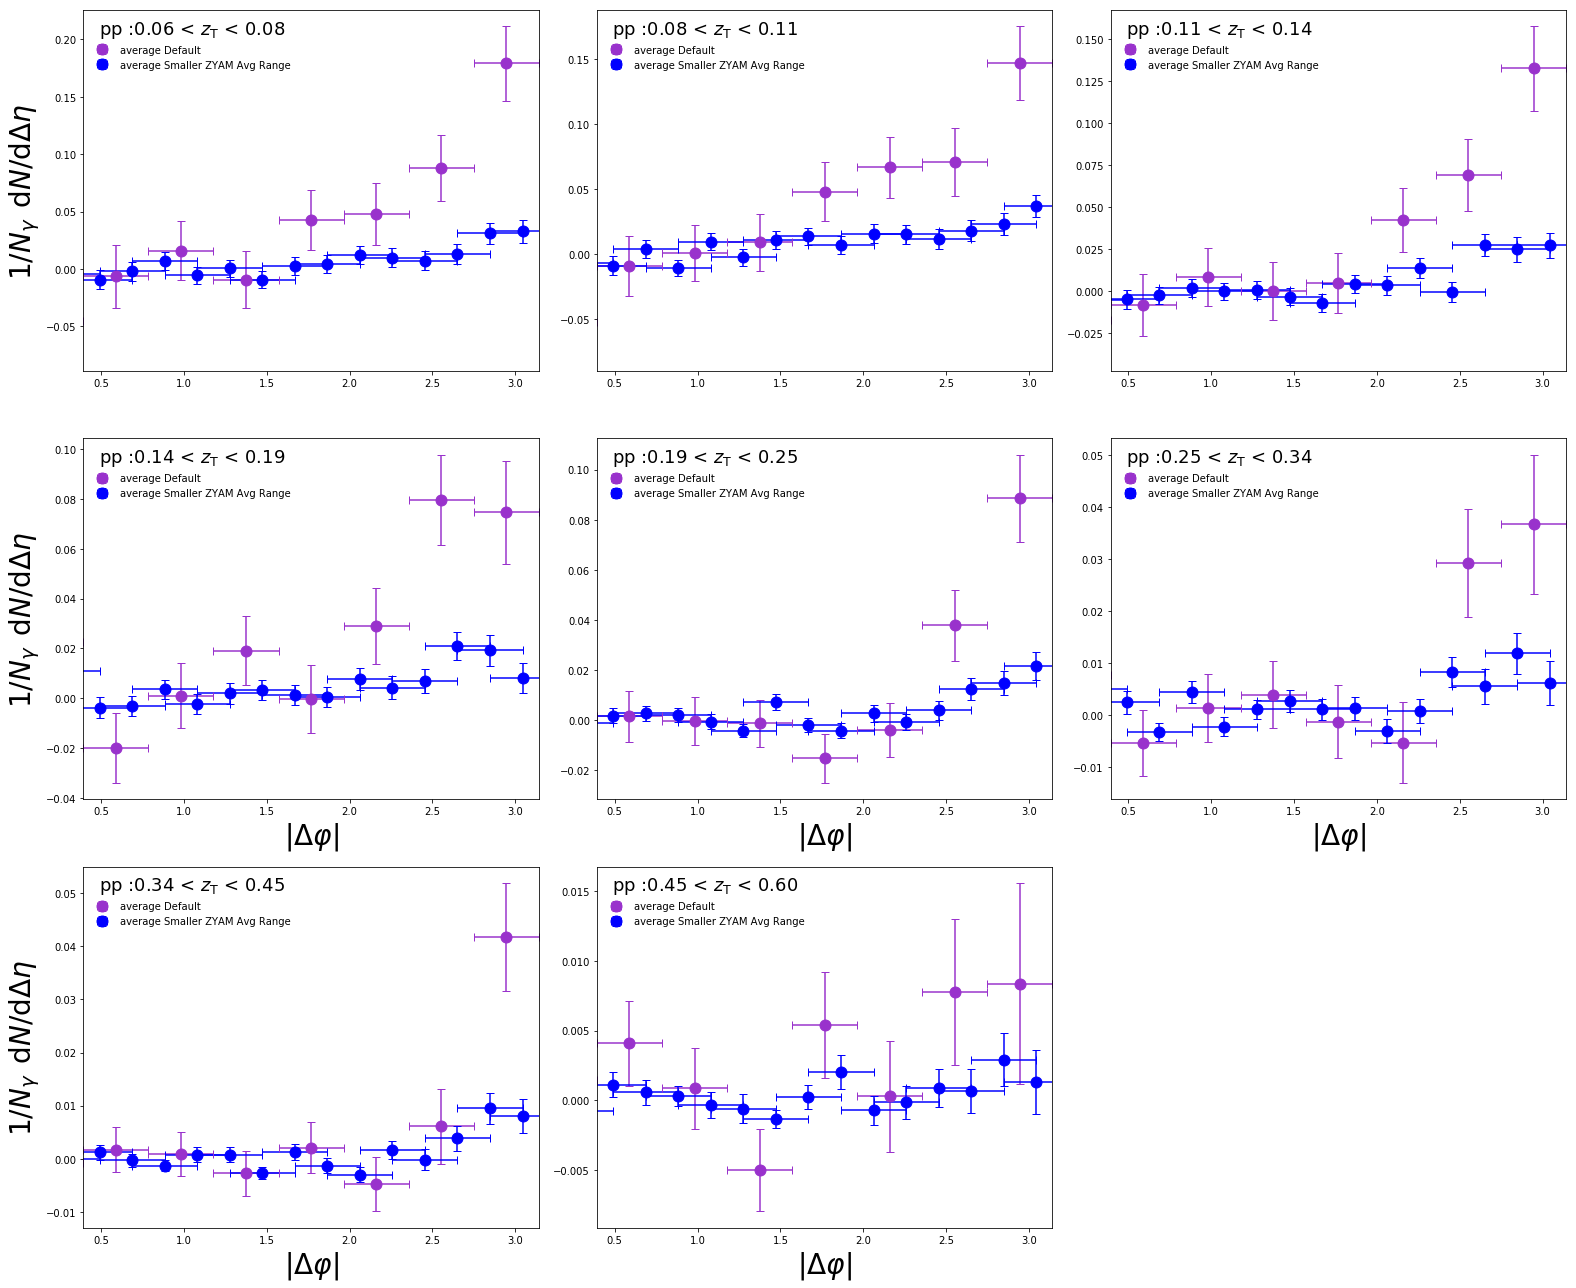

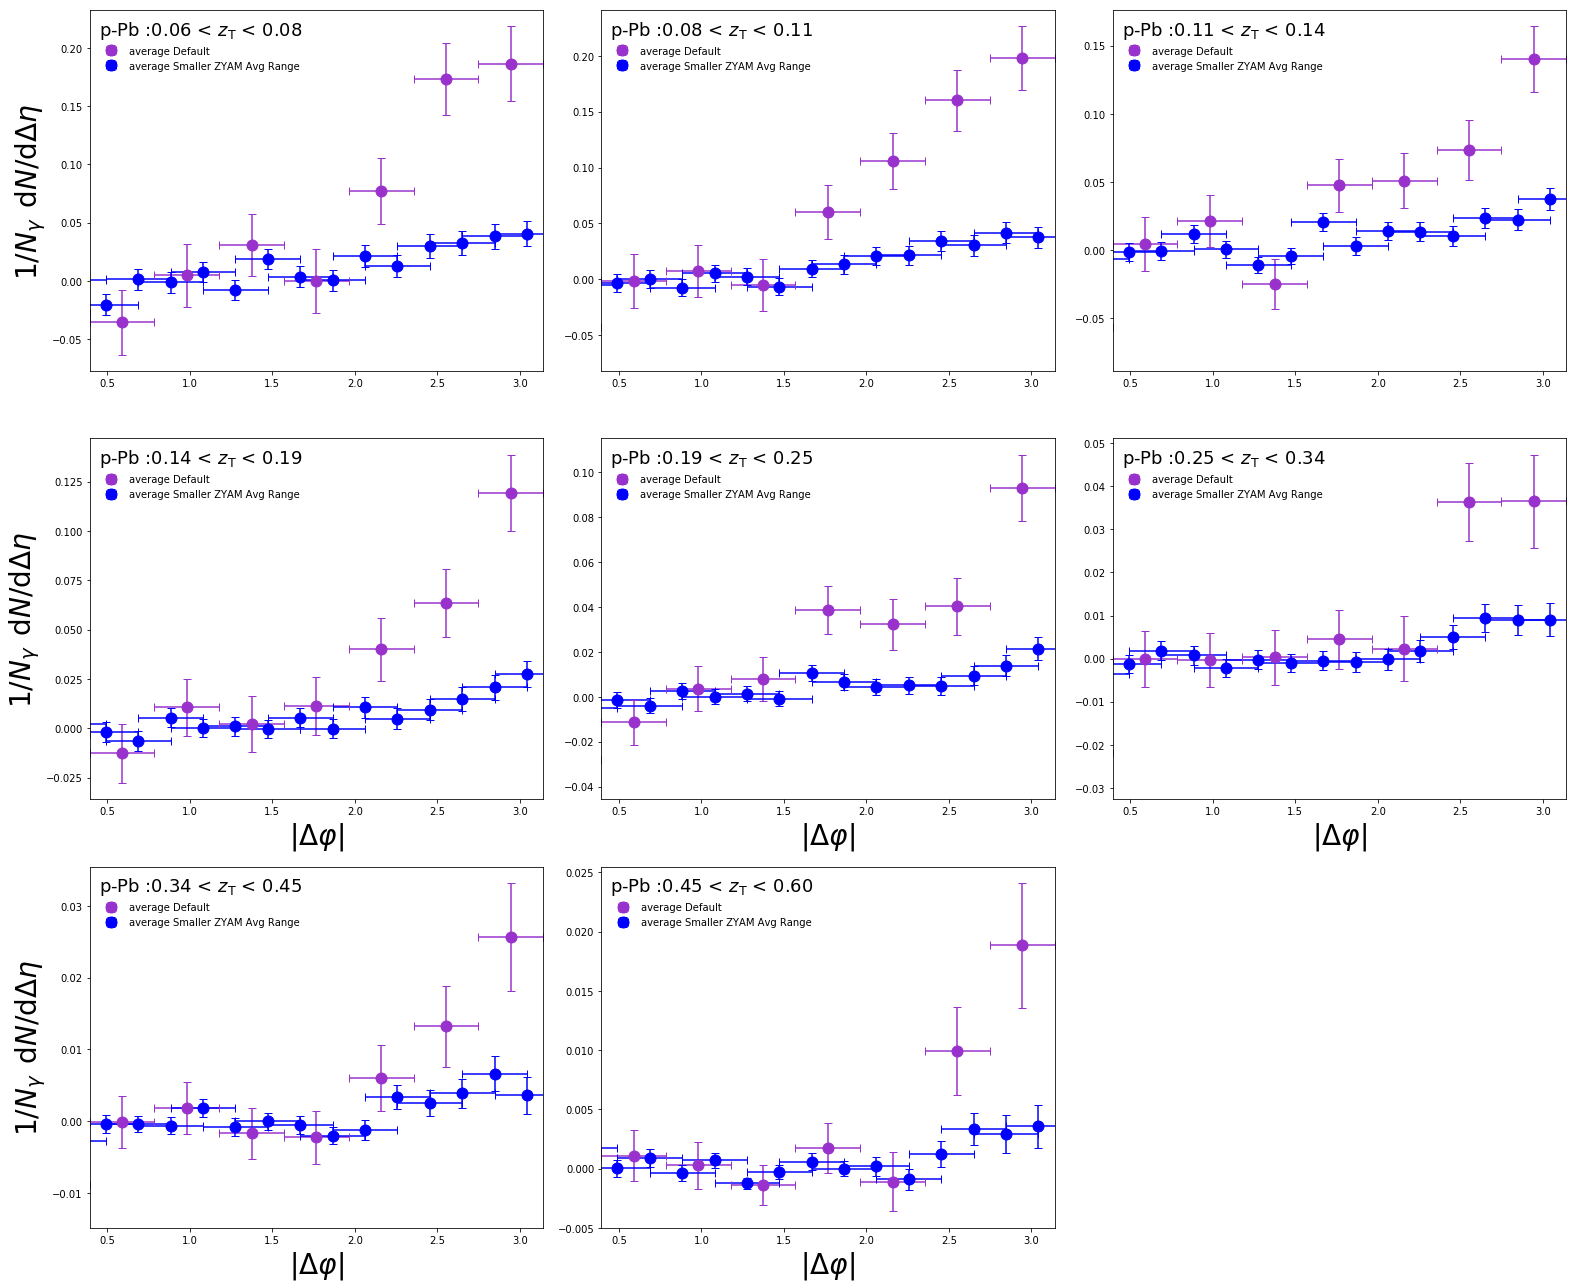

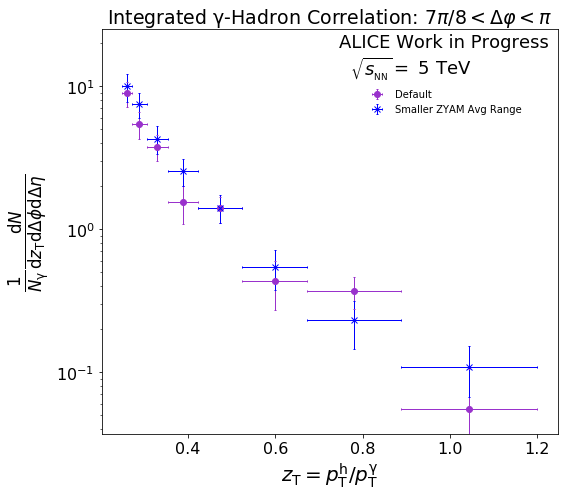

                Central Values:


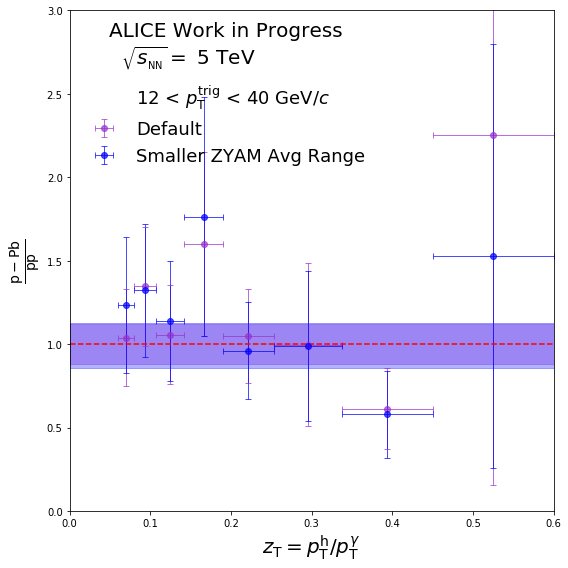

                Central Values:
[1.23224221 1.32240682 1.13881329 1.76339458 0.96182617 0.98979862
 0.58171242 1.52653497]

****************************************
Minimizer is Linear
Chi2                      =      5.09141
NDf                       =            7
p0                        =      1.00246   +/-   0.120582    

****************************************
Minimizer is Linear
Chi2                      =      5.02667
NDf                       =            7
p0                        =     0.993692   +/-   0.136227    


In [30]:
save_name = "ZYAM_Variation"
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTOldBinNewNewPurity_Small_Zyam"]
string_descriptions = ["Default","Smaller ZYAM Avg Range"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

In [31]:
strings = ["zT_Rebin_7_006zT06zT","zT_Rebin_8_006zT06zT","zT_Rebin_9_006zT06zT"]
string_descriptions = ["7 zT Bins","8 zT Bins","9 zT Bins","4 pT Bins"]

strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTOldBinNewNewPurity"]
string_descriptions = ["Old","New"]

colors = ["red","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

TypeError: Compare_pp_pPB_Avg_lists() takes exactly 4 arguments (3 given)

## Compare Different pT Binning

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE"]
string_descriptions = ["1 pT Bins","2 pT Bins","3 pT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
#Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,True)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [ ]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

In [ ]:
reload(functions_fragmentation)
from functions_fragmentation import *
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTpT2"]
string_descriptions = ["1 pT Bin","2 pT Bins"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_1_pDevPlus","pT_Rebin_1_pDevMinus","pT_Rebin_1_90p"]
string_descriptions = ["Cetral Purity","Purity Plus STDV","Purity Minus STDV","purity = 90%"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,False)